In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [13]:
data = {'Date': pd.date_range(start = '2021-04', periods = 19, freq = 'Q'),
        'Total_unemployment': [24, 36, 9, 10, 10, 17, 34, 42, 10, 15, 11, 65, 10, 28, 9, 10, 8, 31, 35],
        'Male_unemployment': [8, 12, 9, 10, 11, 12, 43, 12, 11, 23, 33, 11, 41, 10, 22, 20, 9, 19, 8],
        'Female_unemployment': [7, 61, 8, 10, 19, 13, 15, 11, 13, 9, 29, 24, 19, 8, 17, 16, 8, 7, 4]
       }
df = pd.DataFrame(data)
df.set_index('Date', inplace = True)

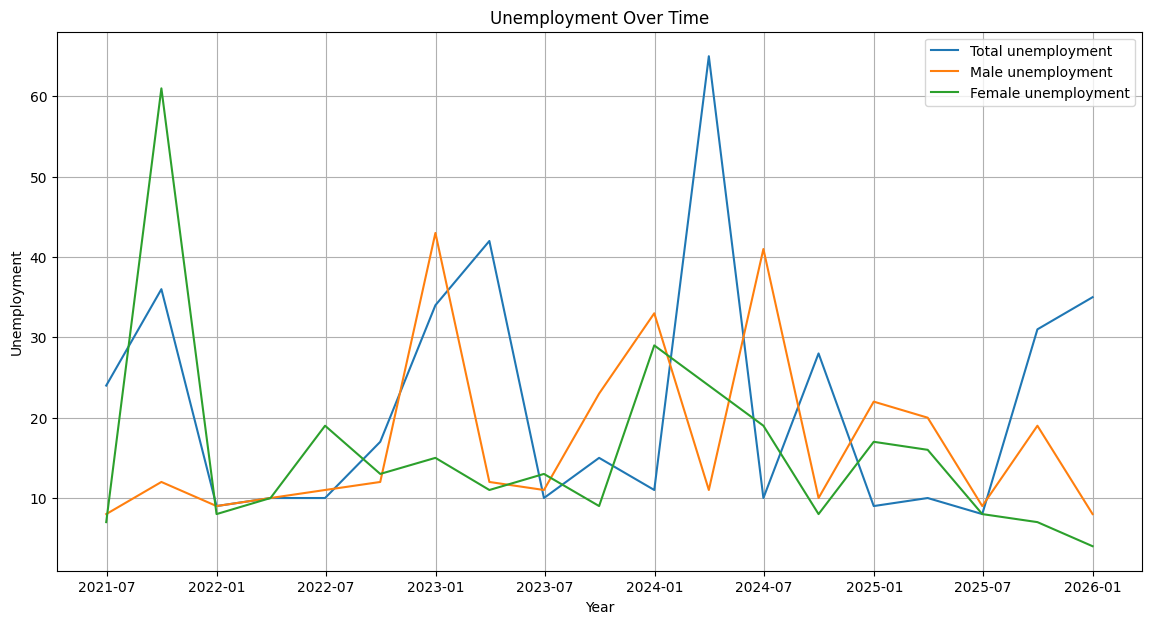

In [14]:
plt.figure(figsize = (14, 7))
plt.plot(df.index, df['Total_unemployment'], label = 'Total unemployment')
plt.plot(df.index, df['Male_unemployment'], label = 'Male unemployment')
plt.plot(df.index, df['Female_unemployment'], label = 'Female unemployment')
plt.title('Unemployment Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
lags = [1, 3, 5, 7]
acvf_total_h = [sm.tsa.acovf(df['Total_unemployment'], adjusted = False)[lag] for lag in lags]
acvf_male_h = [sm.tsa.acovf(df['Male_unemployment'], adjusted = False)[lag] for lag in lags]
acvf_female_h = [sm.tsa.acovf(df['Female_unemployment'], adjusted = False)[lag] for lag in lags]

acf_total_h = [sm.tsa.acf(df['Total_unemployment'], adjusted = False, nlags = lag)[lag] for lag in lags]
acf_male_h = [sm.tsa.acf(df['Male_unemployment'], adjusted = False, nlags = lag)[lag] for lag in lags]
acf_female_h = [sm.tsa.acf(df['Female_unemployment'], adjusted = False, nlags = lag)[lag] for lag in lags]

print("ACVF Total unemployment (h = 1, 3, 5, 7): ", acvf_total_h)
print("ACF Total unemployment (h = 1, 3, 5, 7): ", acf_total_h)
print("ACVF Male unemployment (h = 1, 3, 5, 7): ", acvf_male_h)
print("ACF Male unemployment (h = 1, 3, 5, 7): ", acf_male_h)
print("ACVF Female unemployment (h = 1, 3, 5, 7): ", acvf_female_h)
print("ACF Female unemployment (h= 1, 3, 5, 7): ", acf_female_h)

ACVF Total unemployment (h = 1, 3, 5, 7):  [-27.423385333138942, -106.75215045925061, -0.8980901005977533, 8.401953637556492]
ACF Total unemployment (h = 1, 3, 5, 7):  [-0.12041259736867711, -0.46873511622785674, -0.003943399415147768, 0.0368919098856414]
ACVF Male unemployment (h = 1, 3, 5, 7):  [-23.36856684647908, 12.315352092141707, -6.225105700539437, -18.75171307770812]
ACF Male unemployment (h = 1, 3, 5, 7):  [-0.2062302017205043, 0.10868435205747706, -0.05493725022966648, -0.1654859536755643]
ACVF Female unemployment (h = 1, 3, 5, 7):  [-26.861204257180344, 3.5327307187636627, -1.1813675462895346, -13.147543373669633]
ACF Female unemployment (h= 1, 3, 5, 7):  [-0.17585953458182993, 0.02312868678769826, -0.007734379474256836, -0.08607658973331042]


In [22]:
decomposition = sm.tsa.seasonal_decompose(df['Total_unemployment'], model = 'additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
deseasonalized = df['Total_unemployment'] - seasonal
trend_model = sm.OLS(deseasonalized, sm.add_constant(range(len(deseasonalized))))
trend_results = trend_model.fit()
trend_coefficients = trend_results.params
trend_equation = f"Trend = {trend_coefficients[0]: .2f} + {trend_coefficients[1]: .2f} * t"
forecast_2026 = trend_results.predict([1, len(deseasonalized) + 7])[0]
print("Trend equation: ", trend_equation)
print("Forecast for 2026: ", forecast_2026)

Trend equation:  Trend =  21.94 +  0.06 * t
Forecast for 2026:  23.522834429824563


In [29]:
order_5_diff = df['Total_unemployment'].diff(periods = 5).dropna()
order_12_diff = df['Total_unemployment'].diff(periods = 12).dropna()
print("5th Order Differences: ")
print(order_5_diff)
print("\n12th Order Differences: ")
print(order_12_diff)

5th Order Differences: 
Date
2022-09-30    -7.0
2022-12-31    -2.0
2023-03-31    33.0
2023-06-30     0.0
2023-09-30     5.0
2023-12-31    -6.0
2024-03-31    31.0
2024-06-30   -32.0
2024-09-30    18.0
2024-12-31    -6.0
2025-03-31    -1.0
2025-06-30   -57.0
2025-09-30    21.0
2025-12-31     7.0
Name: Total_unemployment, dtype: float64

12th Order Differences: 
Date
2024-06-30   -14.0
2024-09-30    -8.0
2024-12-31     0.0
2025-03-31     0.0
2025-06-30    -2.0
2025-09-30    14.0
2025-12-31     1.0
Name: Total_unemployment, dtype: float64


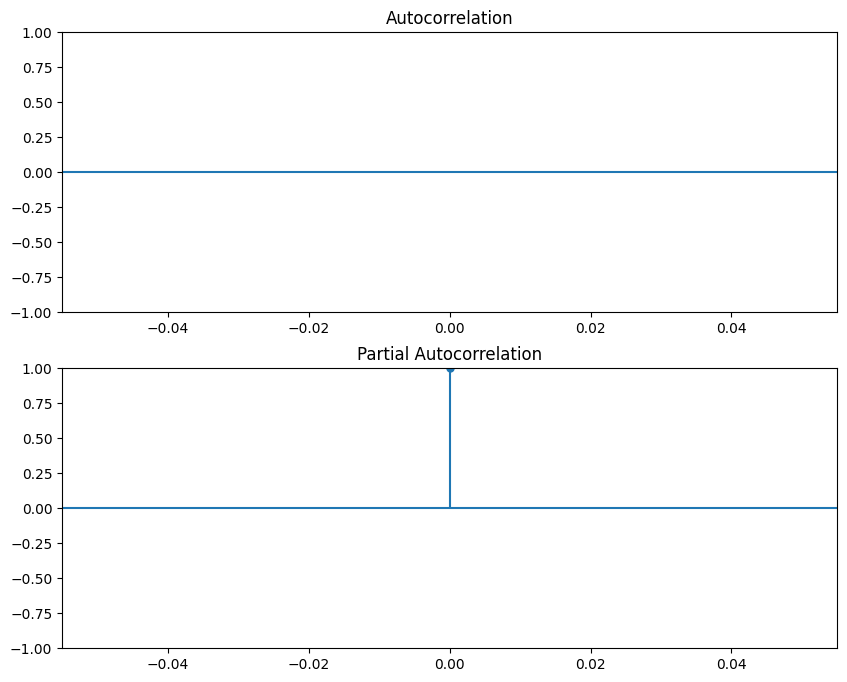

In [32]:
import statsmodels.api as sm
df['Differenced_unemployment'] = df['Total_unemployment'].diff().dropna()

fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sm.graphics.tsa.plot_acf(df['Differenced_unemployment'], lags = 10, ax = ax[0])
sm.graphics.tsa.plot_pacf(df['Differenced_unemployment'], lags = 5, ax = ax[1])
plt.show()

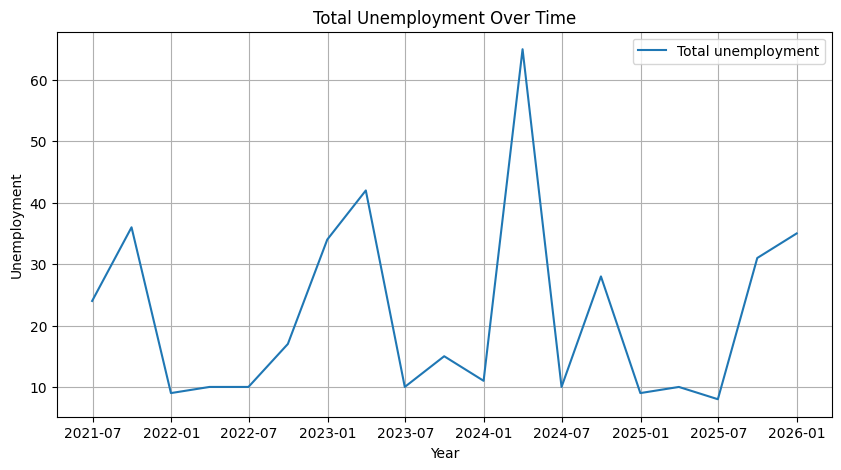

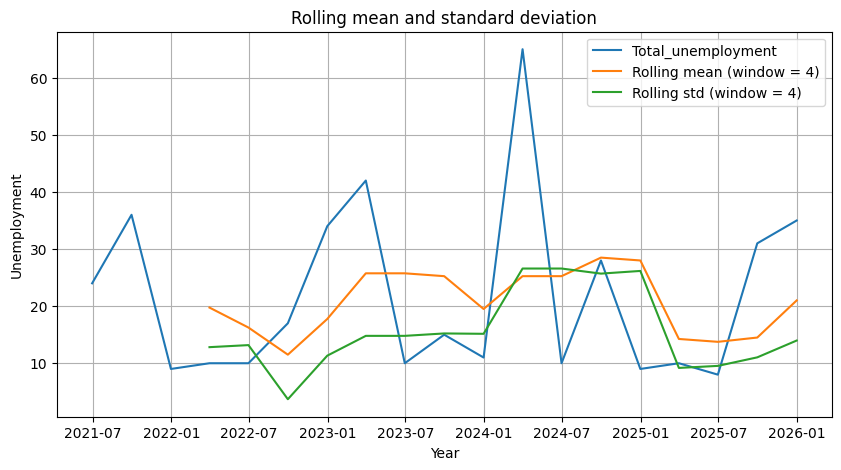

In [27]:
data = {'Date': pd.date_range(start = '2021-04', periods = 19, freq = 'Q'),
        'Total_unemployment': [24, 36, 9, 10, 10, 17, 34, 42, 10, 15, 11, 65, 10, 28, 9, 10, 8, 31, 35]
       }
df = pd.DataFrame(data)
df.set_index('Date', inplace = True)

plt.figure(figsize = (10, 5))
plt.plot(df.index, df['Total_unemployment'], label = 'Total unemployment')
plt.title('Total Unemployment Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment')
plt.legend()
plt.grid(True)
plt.show()

rolling_mean = df['Total_unemployment'].rolling(window = 4).mean()
rolling_std = df['Total_unemployment'].rolling(window = 4).std()

plt.figure(figsize = (10, 5))
plt.plot(df.index, df['Total_unemployment'], label = 'Total_unemployment')
plt.plot(rolling_mean, label = 'Rolling mean (window = 4)')
plt.plot(rolling_std, label = 'Rolling std (window = 4)')
plt.title('Rolling mean and standard deviation')
plt.xlabel('Year')
plt.ylabel('Unemployment')
plt.legend()
plt.grid(True)
plt.show()